In [72]:
from DOE import Anova_NoBlock
from scipy import stats
import numpy as np

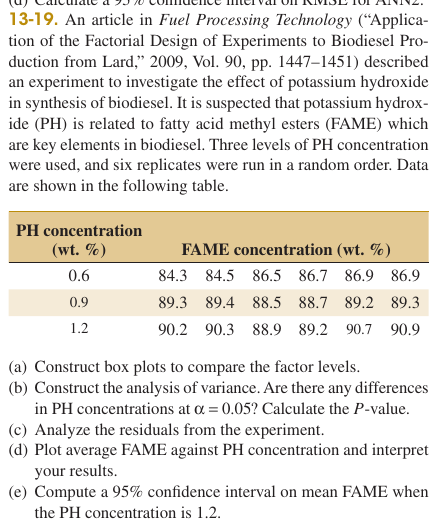

In [73]:
alpha = 0.05
n = 6
a = 3
Data = Anova_NoBlock("opdrachten.xlsx", alpha, n, a)

In [74]:
df, df_melt, names, mean = Data.import_df("13.19")

In [75]:
df

,0.6,0.9,1.2
1,84.3,89.3,90.2
2,84.5,89.4,90.3
3,86.5,88.5,88.9
4,86.7,88.7,89.2
5,86.9,89.2,90.7
6,86.9,89.3,90.9


# A

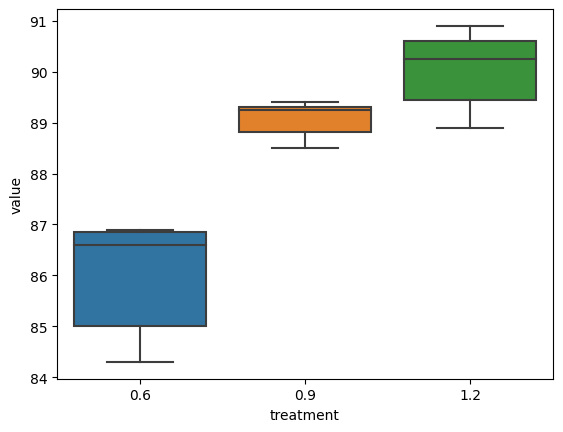

In [76]:
Data.boxplot()

Uit de boxplot lijkt er een significant verschil te zijn tussen de treatments.

# Nulhypothese

H0 $\mu_i = \mu$

H1 $\mu_i \neq \mu$

In [77]:
df_melt, anova_table, pvalue, lsd, mse = Data.anova()

H0 rejected
1-2: SIGNIFICANT DIFFERENCE!
1-3: SIGNIFICANT DIFFERENCE!
2-3: no significant difference 


In [78]:
anova_table

,sum_sq,df,F,PR(>F)
treatment,54.164444,2.0,35.447935,0.000002
Residual,11.460000,15.0,NaN,NaN


# B

Er blijkt uit de analyse een significant verschil te zijn tussen de treatments. Daarom wordt H0 verworpen.

p-waarde = 0.000002

# C

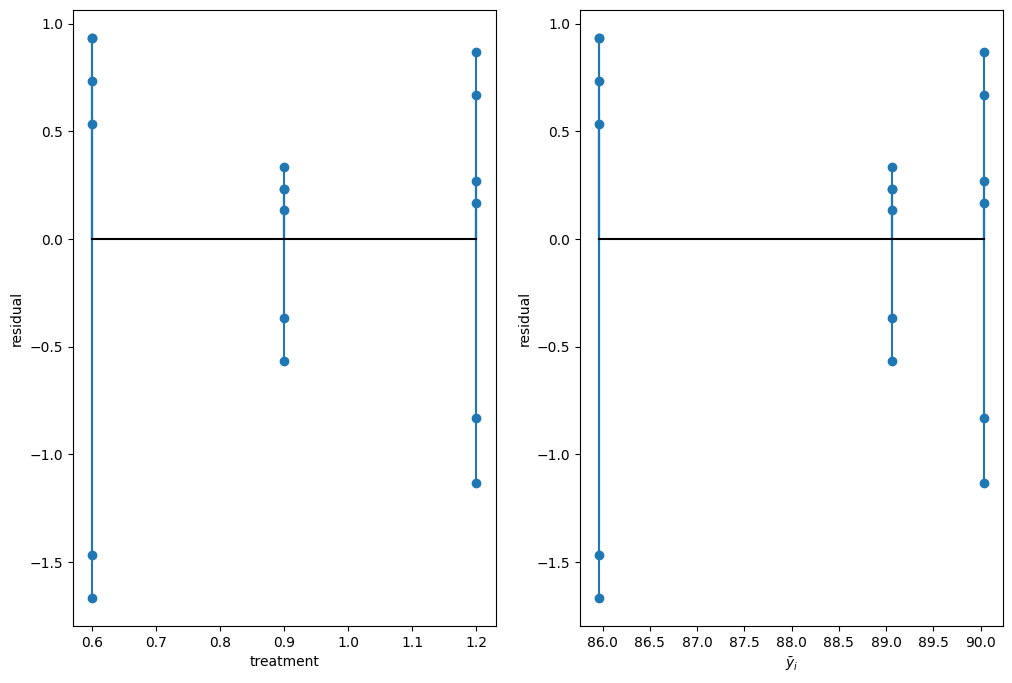

In [80]:
Data.res_plot()

Beide residuals hebben V-vorm, dus er kan nog een extra afhankelijkheid zijn die niet meegenomen wordt in het model.

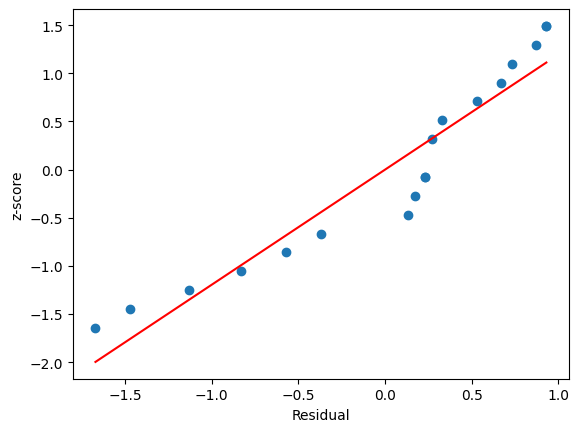

In [85]:
Data.norm_plot()

Volgt geen normale verdeling.

# D

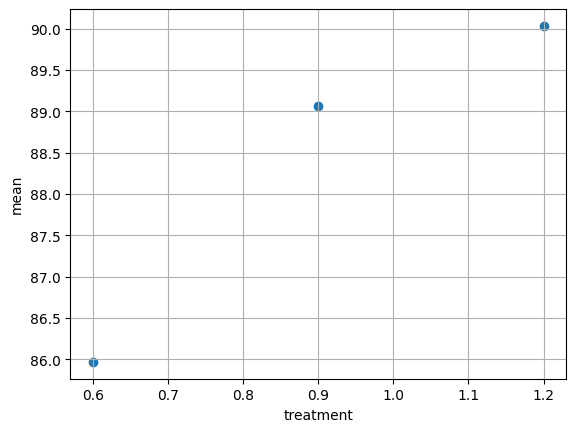

In [84]:
Data.meanplot()

Er is te zien dat treatment 1 verschilt van de overige treatments.

In [86]:
std2 = df[1.2].values.std()
mean2 = mean[1]
t = stats.t.ppf(1-alpha/2, n, a)
xmin = mean2 - t*std2/(np.sqrt(n))
xmax = mean2 + t*std2/(np.sqrt(n))

mu = np.array([xmin, xmax])

print(mu)


[87.42420889 90.70912444]


# D

Betrouwbaarheids interval:

$$ 87,42 \leq \mu \leq 90,71$$

In [91]:
from IPython.display import Markdown as md

md(f"$${xmin.round(2)} \leq \mu \leq{xmax.round(2)}")

$$87.42 \leq \mu \leq90.71